# Graph Visualizations i.e. Network Analysis


Networks, a.k.a graphs are useful modelling tool to model complex relational problems.

Networks are comprised of two main entities:
* Nodes: commonly represented as circles. In the academic literature, nodes are also known as "vertices"
* Edges: commonly represented as lines between circles

Edges denotes relationships between the nodes.

In a network, if two nodes are joined together by an edge, then they are neighbors of one another.

There are generally two types of networks - directed and undirected. In undirected networks, edges do not have a directionality associated with them. In directed networks, they do.


## Examples of networks
* Undirected network
    * Facebook's network: Individuals are nodes, edges are drawn between individuals who are FB friends with one another
* Directed Network
    * Air traffic network: Airports are nodes, flights between airports are the edges

# Network Analysis & Networkx

In this notebook, we will work with a social network of seventh graders, in which nodes are individual students, and edges represent their relationships. Edges between individuals show how often the seventh graders indicated other seventh graders as their favourite.

Data credit: http://konect.uni-koblenz.de/networks/moreno_seventh

## Data Representation

In the `networkx` implementation, graph objects store their data in dictionaries. 

Nodes are part of the attribute `Graph.node`, which is a dictionary where the key is the node ID and the values are a dictionary of attributes. 

Edges are part of the attribute `Graph.edge`, which is a nested dictionary. Data are accessed as such: `G.edge[node1, node2]['attr_name']`.

Because of the dictionary implementation of the graph, any hashable object can be a node. This means strings and tuples, but not lists and sets.

## Data

meetup.com is a website for people organizing and attending regular or semi-regular events ("meet-ups"). The relationships amongst users—who goes to what meetups—are a social network, ideal for graph-based analysis.

This dataset was generated for a talk titled Principles of Network Analysis with NetworkX, embedded online here (or with notebooks, etc. on Github). It forms the basis for a series of tutorials I presented on at PyNash and PyTennessee. In them, we work through the basics of graph theory and how to use NetworkX, a popular open-source Python package. We then apply this knowledge to extract insights about the social fabric of Tennessee MeetUp groups.

## Load Data

In [1]:
import pandas as pd
import networkx as nx

# Load the member edgelist for constructing a member-to-member graph
# Weights represent shared group membership
df = pd.read_csv("data/member-edges.csv")

G = nx.from_pandas_edgelist(df, 'member1', 'member2', ['weight'])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Basic Network Statistics

Let's first understand how the network is represented.

In [2]:
# Who are represented in the network?
list(G.nodes())

[198737924,
 220654721,
 208201738,
 88664332,
 8640526,
 56356372,
 183880473,
 194617630,
 185626278,
 8809394,
 193825984,
 145838912,
 182472899,
 8998727,
 3036107,
 127853262,
 209148366,
 207093714,
 204969170,
 156443612,
 12916961,
 66842212,
 216446825,
 183097071,
 212660721,
 160810612,
 200806774,
 154764282,
 14497407,
 73498632,
 66999812,
 221126666,
 197747724,
 91563022,
 10798095,
 201765390,
 204465678,
 207654954,
 188889135,
 53159472,
 192814642,
 197681727,
 189163080,
 223143499,
 141761102,
 26324562,
 216567379,
 202135638,
 150355032,
 212232797,
 117939302,
 211518566,
 230659176,
 26285162,
 222579306,
 45382252,
 183766136,
 192131215,
 189705878,
 185636517,
 109335722,
 184418986,
 144256692,
 220919480,
 42441402,
 238843578,
 183370428,
 13579455,
 35275462,
 205336779,
 184175830,
 218384086,
 198681310,
 151512802,
 195517167,
 182863105,
 213190404,
 14144267,
 238077203,
 221803801,
 235847459,
 56588072,
 44125492,
 127366452,
 80835382,
 2630124

### Exercise

Can you write a single line of code that returns the number of nodes in the graph? (1 min.)

In [3]:
len(G.nodes())

504

Let's now figure out who is connected to who in the network

In [4]:
# Who is connected to who in the network?
list(G.edges())

[(198737924, 220654721),
 (198737924, 208201738),
 (198737924, 88664332),
 (198737924, 8640526),
 (198737924, 56356372),
 (198737924, 183880473),
 (198737924, 194617630),
 (198737924, 185626278),
 (198737924, 8809394),
 (198737924, 193825984),
 (198737924, 145838912),
 (198737924, 182472899),
 (198737924, 8998727),
 (198737924, 3036107),
 (198737924, 127853262),
 (198737924, 209148366),
 (198737924, 207093714),
 (198737924, 204969170),
 (198737924, 156443612),
 (198737924, 12916961),
 (198737924, 66842212),
 (198737924, 216446825),
 (198737924, 183097071),
 (198737924, 212660721),
 (198737924, 160810612),
 (198737924, 200806774),
 (198737924, 154764282),
 (198737924, 14497407),
 (73498632, 66999812),
 (73498632, 221126666),
 (73498632, 197747724),
 (73498632, 91563022),
 (73498632, 10798095),
 (73498632, 201765390),
 (73498632, 204465678),
 (73498632, 207654954),
 (73498632, 188889135),
 (73498632, 53159472),
 (73498632, 192814642),
 (73498632, 197681727),
 (73498632, 189163080),
 (734

### Exercise

Can you write a single line of code that returns the number of relationships represented?

In [5]:
len(G.edges())

499

## Concept

A **network**, more technically known as a **graph**, is comprised of:

- a set of nodes
- joined by a set of edges

They can be represented as two lists:

1. A **node list**: a list of 2-tuples where the first element of each tuple is the representation of the node, and the second element is a dictionary of metadata associated with the node.
2. An **edge list**: a list of 3-tuples where the first two elements are the nodes that are connected together, and the third element is a dictionary of metadata associated with the edge.

Since this is a network of games, there'll be attributes for each team, such as the conference they played.

In [6]:
# Let's get a list of nodes with their attributes.
list(G.nodes(data=True))[0:5]

[(198737924, {}),
 (220654721, {}),
 (208201738, {}),
 (88664332, {}),
 (8640526, {})]

Edges can also store attributes in their attribute dictionary

In [7]:
list(G.edges(data=True))[0:5]

[(198737924, 220654721, {'weight': 1}),
 (198737924, 208201738, {'weight': 1}),
 (198737924, 88664332, {'weight': 1}),
 (198737924, 8640526, {'weight': 1}),
 (198737924, 56356372, {'weight': 1})]

## Drawing Graphs

As illustrated above, we can draw graphs using the `nx.draw()` function. The most popular format for drawing graphs is the **node-link diagram**.

Nodes are circles and lines are edges. Nodes more tightly connected with one another are clustered together. Large graphs end up looking like hairballs.

In [8]:
nx.draw(G)

If the network is small enough to visualize, and the node labels are small enough to fit in a circle, then you can use the `with_labels=True` argument.

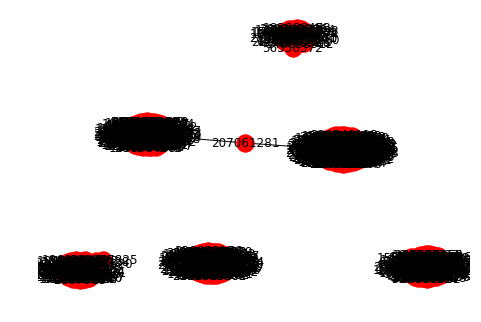

In [9]:
nx.draw(G, with_labels=True)

However, note that if the number of nodes in the graph gets really large, node-link diagrams can begin to look like massive hairballs. This is undesirable for graph visualization.

## Matrix Plot

Instead, we can use a **matrix** to represent them. The nodes are on the x- and y- axes, and a filled square represent an edge between the nodes. This is done by using the `MatrixPlot` object from `nxviz`.

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


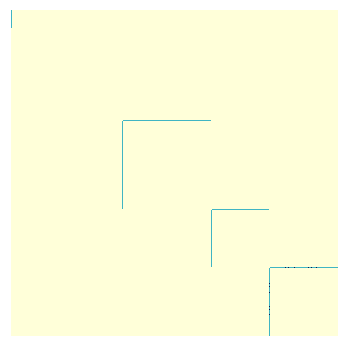

In [10]:
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

m = MatrixPlot(G)
m.draw()
plt.show()

## Arc Plot

The Arc Plot is the basis of the next set of rational network visualizations.

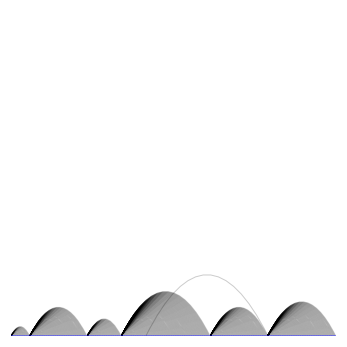

In [11]:
from nxviz import ArcPlot

a = ArcPlot(G)
a.draw()

## Circos Plot

Let's try another visualization, the **Circos plot**. We can order the nodes in the Circos plot according to the node ID, but any other ordering is possible as well. Edges are drawn between two nodes.

Credit goes to Justin Zabilansky (MIT) for the implementation, Jon Charest for subsequent improvements, and `nxviz` contributors for further development.

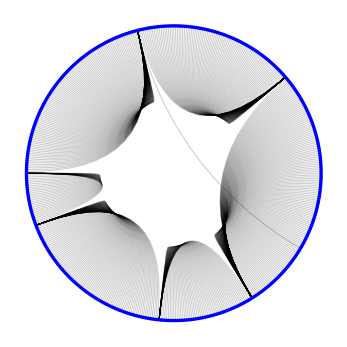

In [12]:
from nxviz import CircosPlot

c = CircosPlot(G)
c.draw()
plt.savefig('circos_plot.png', dpi=300)

This visualization helps us highlight nodes that there are poorly connected.

## Hubs: How do we evaluate the importance of some individuals in a network?

Within a social network, there will be certain individuals which perform certain important functions. For example, there may be hyper-connected individuals who are connected to many, many more people. They would be of use in the spreading of information. Alternatively, if this were a disease contact network, identifying them would be useful in stopping the spread of diseases. How would one identify these people?

### Approach 1: Neighbors
One way we could compute this is to find out the number of people an individual is conencted to. NetworkX let's us do this by giving us a G.neighbors(node) function.

In [13]:
# Let's find out the number of neighbors that individual #7 has.
len(list(G.neighbors(198737924)))

28

#### Exercise

Can you create a ranked list of the importance of each individual, based on the number of neighbors they have? (3 min.)

Hint: One suggested output would be a list of tuples, where the first element in each tuple is the node ID (an integer number), and the second element is the number of neighbors that it has.

Hint: Python's sorted(iterable, key=lambda x:...., reverse=True) function may be of help here.

In [14]:
# Possible Answers:
sorted(G.nodes(), 
       key=lambda x:len(list(G.neighbors(x))), reverse=True)[0:5]
# sorted([(n, G.neighbors(n)) for n in G.nodes()], 
#        key=lambda x: len(x[1]), reverse=True)[0:5]

[216072216, 234684445, 73498632, 183566364, 182943766]

### Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. NetworkX implements a degree centrality, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using nx.degree_centrality(G)

In [15]:
# nx.degree_centrality(G)

# Uncomment the next line to show a truncated version.
list(nx.degree_centrality(G).items())[0:5]

[(198737924, 0.05566600397614314),
 (220654721, 0.0019880715705765406),
 (208201738, 0.0019880715705765406),
 (88664332, 0.0019880715705765406),
 (8640526, 0.0019880715705765406)]

There are other measures of centrality, namely betweenness centrality, flow centrality and load centrality. You can take a look at their definitions on the NetworkX API docs and their cited references. You can also define your own measures if those don't fit your needs, but that is an advanced topic that won't be dealt with here.

These slides/demos are based on concepts from: https://github.com/ericmjl/Network-Analysis-Made-Simple.